## importing libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

Saving test.csv to test.csv
Saving train.csv to train.csv


## dataset information

🔹 First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37

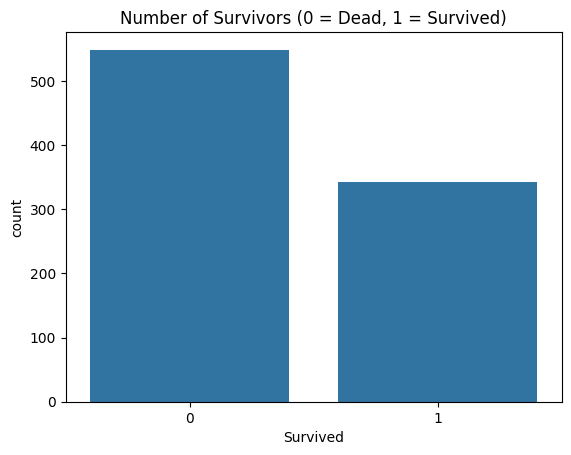

In [ ]:
print("🔹 First few rows of the dataset:")
print(train_df.head())
print('\n')

print("\n🔹 General information:")
print(train_df.info())
print('\n')

print("\n🔹 Missing values in each column:")
print(train_df.isnull().sum())
print('\n')

print("\n🔹 Descriptive statistics:")
print(train_df.describe())

sns.countplot(data=train_df, x="Survived")
plt.title("Number of Survivors (0 = Dead, 1 = Survived)")
plt.show()
print('\n')


## preprocessing

In [ ]:
# spliting data to 2 parts
x = train_df.drop('Survived', axis=1)
y = train_df['Survived']

print(x.shape,y.shape)

(891, 11) (891,)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Imputing missing values
age_imputer = SimpleImputer(strategy='median')
x['Age'] = age_imputer.fit_transform(x[['Age']])
embarked_imputer = SimpleImputer(strategy="most_frequent")
x['Embarked'] = embarked_imputer.fit_transform(x[['Embarked']])[:, 0]

# Encoding categorical variables
le_sex = LabelEncoder()
x['Sex'] = le_sex.fit_transform(x['Sex'])
le_embarked = LabelEncoder()
x["Embarked"] = le_embarked.fit_transform(x["Embarked"])

# Deleting useless features
x = x.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

print(x.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2


In [ ]:
# normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x[['Age', 'Fare']] = scaler.fit_transform(x[['Age', 'Fare']])


print(x)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1 -0.565736      1      0 -0.502445         2
1         1    0  0.663861      1      0  0.786845         0
2         3    0 -0.258337      0      0 -0.488854         2
3         1    0  0.433312      1      0  0.420730         2
4         3    1  0.433312      0      0 -0.486337         2
..      ...  ...       ...    ...    ...       ...       ...
886       2    1 -0.181487      0      0 -0.386671         2
887       1    0 -0.796286      0      0 -0.044381         2
888       3    0 -0.104637      1      2 -0.176263         2
889       1    1 -0.258337      0      0 -0.044381         0
890       3    1  0.202762      0      0 -0.492378         1

[891 rows x 7 columns]


In [ ]:
# spliting data for train and test part
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## training data

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
}

for name, model in models.items():
    score = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name}: {score.mean():.4f}")


Logistic Regression: 0.7935
Random Forest: 0.8033
SVM: 0.8103
KNN: 0.7780
Gradient Boosting: 0.7864
